# 유효성 검증

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/국내기후.csv',index_col=0)
df.head()

,관측지점,시간,평균 기온,최저 기온,최고 기온,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,...,합계 일사,일 최심신적설,일 최심적설,합계 3시간 신적설,평균 전운량,평균 중하층운량,평균 지면온도,합계 대형증발량,합계 소형증발량,안개 계속 시간
2569,서울,1980-01-01,3.8,0.5,6.6,0.0,0.0,6.7,20.0,4.0,...,3.23,0.0,0.0,0.0,8.0,-999.0,0.2,2.721902,1.8,0.0
2570,서울,1980-01-02,4.7,3.5,5.9,0.0,9.9,9.9,20.0,4.7,...,0.95,0.0,0.0,0.0,10.0,-999.0,1.9,2.721902,0.8,0.0
2571,서울,1980-01-03,3.8,-0.5,6.2,0.0,0.0,8.9,270.0,7.2,...,5.48,0.0,0.0,0.0,9.5,-999.0,2.8,2.721902,0.9,0.0
2572,서울,1980-01-04,-3.2,-6.9,-0.5,0.0,0.0,9.8,270.0,6.0,...,7.28,0.0,0.0,0.0,4.3,-999.0,-1.0,2.721902,1.5,0.0
2573,서울,1980-01-05,-5.3,-9.1,-1.0,0.0,0.6,6.2,230.0,5.7,...,9.21,1.2,1.2,0.0,2.5,-999.0,-2.5,2.721902,2.1,0.0


In [3]:
df.shape

(176586, 33)

In [4]:
df['관측지점'].value_counts()

대전     30684
서울     15342
강릉     15342
춘천     15342
청주     15342
전주     15342
광주     15342
대구     15342
제주     15342
울릉도    15342
백령도     7824
Name: 관측지점, dtype: int64

In [5]:
# 대전 데이터 2개씩 들어있음

df[df['관측지점']=='대전']['시간'].value_counts()

1980-01-01    2
2008-01-06    2
2007-12-25    2
2007-12-26    2
2007-12-27    2
             ..
1994-01-05    2
1994-01-06    2
1994-01-07    2
1994-01-08    2
2022-01-01    2
Name: 시간, Length: 15342, dtype: int64

In [6]:
df[df['관측지점']=='대전'].sort_values(by='시간')

,관측지점,시간,평균 기온,최저 기온,최고 기온,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,...,합계 일사,일 최심신적설,일 최심적설,합계 3시간 신적설,평균 전운량,평균 중하층운량,평균 지면온도,합계 대형증발량,합계 소형증발량,안개 계속 시간
1835,대전,1980-01-01,3.7,-2.3,6.3,0.0,0.1,9.0,160.0,5.0,...,13.758062,0.0,0.0,0.0,9.0,-999.0,3.3,2.704855,1.1,0.0
1835,대전,1980-01-01,3.7,-2.3,6.3,0.0,0.1,9.0,160.0,5.0,...,13.758062,0.0,0.0,0.0,9.0,-999.0,3.3,2.704855,1.1,0.0
1836,대전,1980-01-02,6.3,5.1,8.3,0.0,5.0,12.0,160.0,4.3,...,13.758062,0.0,0.0,0.0,10.0,-999.0,5.9,2.704855,0.5,0.0
1836,대전,1980-01-02,6.3,5.1,8.3,0.0,5.0,12.0,160.0,4.3,...,13.758062,0.0,0.0,0.0,10.0,-999.0,5.9,2.704855,0.5,0.0
1837,대전,1980-01-03,4.7,2.3,5.9,0.0,1.6,5.4,340.0,3.0,...,13.758062,0.0,0.0,0.0,10.0,-999.0,5.4,2.704855,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174393,대전,2021-12-30,-1.4,-4.5,3.0,0.0,0.5,10.6,340.0,4.8,...,7.110000,2.3,2.3,2.5,5.5,4.4,-0.7,0.900000,1.4,0.0
174394,대전,2021-12-31,-5.0,-8.3,0.5,0.0,0.0,10.2,340.0,5.9,...,11.560000,0.0,2.0,0.0,0.0,0.0,-2.0,1.300000,1.9,0.0
174394,대전,2021-12-31,-5.0,-8.3,0.5,0.0,0.0,10.2,340.0,5.9,...,11.560000,0.0,2.0,0.0,0.0,0.0,-2.0,1.300000,1.9,0.0
174395,대전,2022-01-01,-4.4,-10.0,2.3,0.0,0.0,4.7,20.0,2.8,...,10.740000,0.0,0.0,0.0,2.9,1.1,-3.4,1.100000,1.6,0.0


In [7]:
# 대전 중복값 제거
df.drop_duplicates(inplace= True)

In [8]:
df

,관측지점,시간,평균 기온,최저 기온,최고 기온,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,...,합계 일사,일 최심신적설,일 최심적설,합계 3시간 신적설,평균 전운량,평균 중하층운량,평균 지면온도,합계 대형증발량,합계 소형증발량,안개 계속 시간
2569,서울,1980-01-01,3.8,0.5,6.6,0.0,0.0,6.7,20.0,4.0,...,3.23,0.0,0.0,0.0,8.0,-999.0,0.2,2.721902,1.8,0.0
2570,서울,1980-01-02,4.7,3.5,5.9,0.0,9.9,9.9,20.0,4.7,...,0.95,0.0,0.0,0.0,10.0,-999.0,1.9,2.721902,0.8,0.0
2571,서울,1980-01-03,3.8,-0.5,6.2,0.0,0.0,8.9,270.0,7.2,...,5.48,0.0,0.0,0.0,9.5,-999.0,2.8,2.721902,0.9,0.0
2572,서울,1980-01-04,-3.2,-6.9,-0.5,0.0,0.0,9.8,270.0,6.0,...,7.28,0.0,0.0,0.0,4.3,-999.0,-1.0,2.721902,1.5,0.0
2573,서울,1980-01-05,-5.3,-9.1,-1.0,0.0,0.6,6.2,230.0,5.7,...,9.21,1.2,1.2,0.0,2.5,-999.0,-2.5,2.721902,2.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175486,백령도,2021-12-28,2.0,-1.4,5.8,0.0,0.0,9.5,140.0,7.2,...,3.39,0.0,0.8,0.0,5.3,4.5,-2.1,1.100000,1.5,0.0
175487,백령도,2021-12-29,2.7,-1.7,6.5,0.0,0.0,19.8,340.0,13.3,...,6.36,0.0,0.0,0.0,5.3,5.3,1.3,2.000000,2.8,0.0
175488,백령도,2021-12-30,-0.8,-2.2,1.4,0.0,0.3,21.1,340.0,14.2,...,3.66,0.0,0.0,0.0,6.1,6.1,-1.2,1.800000,2.5,0.0
175489,백령도,2021-12-31,-3.1,-3.9,-1.5,0.0,0.0,20.6,340.0,13.4,...,8.83,0.0,0.0,0.0,4.8,4.8,-2.7,1.100000,1.6,0.0


In [9]:
# 백령도를 제외하고 다 같은 행수를 가짐
df['관측지점'].value_counts()

서울     15342
강릉     15342
춘천     15342
대전     15342
청주     15342
전주     15342
광주     15342
대구     15342
제주     15342
울릉도    15342
백령도     7824
Name: 관측지점, dtype: int64

In [10]:
# 유효성 검증을 위해 기간 1990년1월1일 ~ 2021년 12월 31일 생성하기

import datetime
# 기간을 넣어줄 딕셔너리 생성
days = dict()
day_lst = np.arange(datetime.datetime(1990,1,1),datetime.datetime(2022,1,1),datetime.timedelta(days=1))
days['시간'] = day_lst

# 기간 데이터프레임 만들기

df_days = pd.DataFrame(days)
df_days

# 데이터 형식 날짜형으로 바꿔주기
df['시간'] = df['시간'].astype('datetime64')

In [11]:
df_days

,시간
0,1990-01-01
1,1990-01-02
2,1990-01-03
3,1990-01-04
4,1990-01-05
...,...
11683,2021-12-27
11684,2021-12-28
11685,2021-12-29
11686,2021-12-30


In [12]:
11688 * 8

93504

In [13]:


areas = ['서울', '강릉' ,'춘천', '청주', '전주', '광주', '대구', '제주', '울릉도', '백령도'] 
# area = areas[0]

df_1 = pd.DataFrame()

for area in areas[:8]:
    tmp = df[df['관측지점']== area]

    # df_days 와 merge
    df_merge = pd.merge(df_days, tmp,how = 'left', left_on='시간', right_on = '시간')
    df_1 = pd.concat([df_1,df_merge])
df_1

,시간,관측지점,평균 기온,최저 기온,최고 기온,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,...,합계 일사,일 최심신적설,일 최심적설,합계 3시간 신적설,평균 전운량,평균 중하층운량,평균 지면온도,합계 대형증발량,합계 소형증발량,안개 계속 시간
0,1990-01-01,서울,-1.7,-4.0,1.8,0.0,0.0,7.3,270.0,5.0,...,4.58,0.0,0.0,0.0,3.5,3.6,-1.5,2.721902,0.9,0.0
1,1990-01-02,서울,-3.5,-5.7,-0.9,0.0,0.1,8.6,290.0,4.8,...,3.44,0.1,0.1,0.1,3.5,3.8,-2.9,2.721902,0.8,0.0
2,1990-01-03,서울,-5.0,-7.2,-1.7,0.0,0.0,8.2,290.0,5.0,...,7.63,0.0,0.0,0.0,0.0,0.0,-4.4,2.721902,1.4,0.0
3,1990-01-04,서울,-3.3,-8.9,2.1,0.0,0.0,6.1,290.0,3.0,...,5.84,0.0,0.0,0.0,0.5,1.8,-3.6,2.721902,1.0,0.0
4,1990-01-05,서울,0.7,-2.4,2.1,0.0,3.2,12.3,290.0,7.2,...,0.36,0.6,0.6,0.6,9.0,3.6,-0.6,2.721902,1.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,2021-12-27,제주,4.1,0.8,6.5,0.0,0.1,12.8,20.0,6.8,...,1.37,0.5,1.2,0.5,8.1,8.1,3.9,1.000000,1.4,0.0
11684,2021-12-28,제주,7.2,5.9,8.4,0.0,0.0,9.1,360.0,5.3,...,0.91,0.0,0.0,0.0,8.3,8.0,5.6,0.900000,1.3,0.0
11685,2021-12-29,제주,9.3,6.6,11.5,0.0,0.4,12.8,340.0,7.9,...,4.94,0.0,0.0,0.0,8.5,7.8,6.9,2.300000,3.3,0.0
11686,2021-12-30,제주,6.9,5.8,8.4,0.0,0.0,18.1,340.0,10.1,...,4.85,0.0,0.0,0.0,8.0,8.0,5.9,2.300000,3.2,0.0


In [14]:
## 유효성검증 -> nan값 없음, 즉 모든날짜에 데이터 있음
df_merge.isnull().sum()

시간             0
관측지점           0
평균 기온          0
최저 기온          0
최고 기온          0
1시간 최다강수량      0
일강수량           0
최대 순간풍속        0
최대 순간 풍속 풍향    0
최대 풍속          0
최대 풍속 풍향       0
평균 풍속          0
풍정합            0
최대 풍향          0
평균 이슬점온도       0
평균 상대습도        0
평균 증기압         0
평균 현지기압        0
최고 해면 기압       0
최저 해면기압        0
평균 해면기압        0
합계 일조 시간       0
1시간 최다 일사량     0
합계 일사          0
일 최심신적설        0
일 최심적설         0
합계 3시간 신적설     0
평균 전운량         0
평균 중하층운량       0
평균 지면온도        0
합계 대형증발량       0
합계 소형증발량       0
안개 계속 시간       0
dtype: int64

In [15]:
# 데이터 저장

df_1.to_csv('./data/국내기후(백령도제외).csv')

In [16]:
# 백령도

area = areas[-1]

# for area in areas:
tmp = df[df['관측지점']== area]

# df_days 와 merge

df_merge = pd.merge(df_days, tmp,how = 'left', left_on='시간', right_on = '시간')
df_merge

,시간,관측지점,평균 기온,최저 기온,최고 기온,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,...,합계 일사,일 최심신적설,일 최심적설,합계 3시간 신적설,평균 전운량,평균 중하층운량,평균 지면온도,합계 대형증발량,합계 소형증발량,안개 계속 시간
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,2021-12-27,백령도,-0.1,-5.6,4.1,0.0,0.4,12.8,320.0,8.1,...,3.30,0.4,3.0,0.4,6.3,6.3,-1.7,0.9,1.3,0.0
11684,2021-12-28,백령도,2.0,-1.4,5.8,0.0,0.0,9.5,140.0,7.2,...,3.39,0.0,0.8,0.0,5.3,4.5,-2.1,1.1,1.5,0.0
11685,2021-12-29,백령도,2.7,-1.7,6.5,0.0,0.0,19.8,340.0,13.3,...,6.36,0.0,0.0,0.0,5.3,5.3,1.3,2.0,2.8,0.0
11686,2021-12-30,백령도,-0.8,-2.2,1.4,0.0,0.3,21.1,340.0,14.2,...,3.66,0.0,0.0,0.0,6.1,6.1,-1.2,1.8,2.5,0.0


In [17]:
# 언제부터 Nan값인지 어떻게 알지?
df_merge[df_merge['관측지점'].isnull()]  # 마지막 nan값 확인가능 2000-07-31 까지

,시간,관측지점,평균 기온,최저 기온,최고 기온,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,...,합계 일사,일 최심신적설,일 최심적설,합계 3시간 신적설,평균 전운량,평균 중하층운량,평균 지면온도,합계 대형증발량,합계 소형증발량,안개 계속 시간
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,2000-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3861,2000-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3862,2000-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3863,2000-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 자외선 데이터 유효성 검증

In [18]:
df_u =pd.read_csv('./data/자외선B_일최대값.csv',encoding='cp949')
df_u.head()  # 1999년 2월 9일부터 데이터

,일자,자외선 B 일최고값,Unnamed: 2
0,1999-01-01,NaN,NaN
1,1999-01-02,NaN,NaN
2,1999-01-03,NaN,NaN
3,1999-01-04,NaN,NaN
4,1999-01-05,NaN,NaN


In [19]:
df_u.tail()

,일자,자외선 B 일최고값,Unnamed: 2
8029,2020-12-27,0.04,NaN
8030,2020-12-28,0.05,NaN
8031,2020-12-29,0.03,NaN
8032,2020-12-30,0.05,NaN
8033,2020-12-31,0.05,NaN


In [20]:
# 날짜형 변환
df_u['일자'] = df_u['일자'].astype('datetime64')

In [21]:
# nan값 처리 (보간법)

df_u[df_u['자외선 B 일최고값'].isnull()]['일자']

0      1999-01-01
1      1999-01-02
2      1999-01-03
3      1999-01-04
4      1999-01-05
          ...    
8011   2020-12-09
8012   2020-12-10
8016   2020-12-14
8019   2020-12-17
8021   2020-12-19
Name: 일자, Length: 430, dtype: datetime64[ns]

In [22]:
df_ul = pd.merge(df_days, df_u, how = 'left', left_on='시간',right_on='일자')
df_ul

,시간,일자,자외선 B 일최고값,Unnamed: 2
0,1990-01-01,NaT,NaN,NaN
1,1990-01-02,NaT,NaN,NaN
2,1990-01-03,NaT,NaN,NaN
3,1990-01-04,NaT,NaN,NaN
4,1990-01-05,NaT,NaN,NaN
...,...,...,...,...
11683,2021-12-27,NaT,NaN,NaN
11684,2021-12-28,NaT,NaN,NaN
11685,2021-12-29,NaT,NaN,NaN
11686,2021-12-30,NaT,NaN,NaN


In [23]:
# between_time 함수를 쓰기 위해 날짜 인덱스 지정
df_ul.set_index('시간',inplace=True)

In [24]:
df_ul.index

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='시간', length=11688, freq=None)

In [25]:
# 원하는 기간 추출
df_ul1 = df_ul.loc['2000-01-01':'2020-12-31']
df_ul1

,일자,자외선 B 일최고값,Unnamed: 2
시간,,,
2000-01-01,2000-01-01,0.03,NaN
2000-01-02,2000-01-02,0.03,NaN
2000-01-03,2000-01-03,0.04,NaN
2000-01-04,2000-01-04,0.03,NaN
2000-01-05,2000-01-05,0.01,NaN
...,...,...,...
2020-12-27,2020-12-27,0.04,NaN
2020-12-28,2020-12-28,0.05,NaN
2020-12-29,2020-12-29,0.03,NaN


In [26]:
# 날짜의 유효성 확인
df_ul1.isnull().sum() # 2개의 nan값

일자               2
자외선 B 일최고값     383
Unnamed: 2    7671
dtype: int64

In [27]:
# 날짜 nan값 확인
df_ul1[df_ul1['일자'].isnull()]

,일자,자외선 B 일최고값,Unnamed: 2
시간,,,
2019-09-07,NaT,NaN,NaN
2019-09-08,NaT,NaN,NaN


In [28]:
# 자외선 nan값 확인 -> nan값이 매우 불규칙

df_ul1[df_ul1['자외선 B 일최고값'].isnull()][300:]

,일자,자외선 B 일최고값,Unnamed: 2
시간,,,
2011-03-24,2011-03-24,NaN,NaN
2011-03-28,2011-03-28,NaN,NaN
2011-04-09,2011-04-09,NaN,NaN
2011-06-20,2011-06-20,NaN,NaN
2011-07-18,2011-07-18,NaN,NaN
...,...,...,...
2020-12-09,2020-12-09,NaN,NaN
2020-12-10,2020-12-10,NaN,NaN
2020-12-14,2020-12-14,NaN,NaN


연도 :  2000-1
자외선 평균 :  0.040967741935483894
연도 :  2001-1
자외선 평균 :  0.041935483870967766
연도 :  2002-1
자외선 평균 :  0.04633333333333335
연도 :  2003-1
자외선 평균 :  0.040333333333333346
연도 :  2004-1
자외선 평균 :  0.04645161290322583
연도 :  2005-1
자외선 평균 :  0.05400000000000001
연도 :  2006-1
자외선 평균 :  0.04900000000000002
연도 :  2007-1
자외선 평균 :  0.04387096774193551
연도 :  2008-1
자외선 평균 :  0.0441935483870968
연도 :  2009-1
자외선 평균 :  0.04322580645161292
연도 :  2010-1
자외선 평균 :  0.04129032258064518
연도 :  2011-1
자외선 평균 :  nan
연도 :  2012-1
자외선 평균 :  0.04633333333333335
연도 :  2013-1
자외선 평균 :  0.0509677419354839
연도 :  2014-1
자외선 평균 :  0.04300000000000002
연도 :  2015-1
자외선 평균 :  0.04612903225806454
연도 :  2016-1
자외선 평균 :  0.041935483870967766
연도 :  2017-1
자외선 평균 :  0.05032258064516132
연도 :  2018-1
자외선 평균 :  0.06419354838709682
연도 :  2019-1
자외선 평균 :  0.058064516129032295
연도 :  2020-1
자외선 평균 :  0.04161290322580648


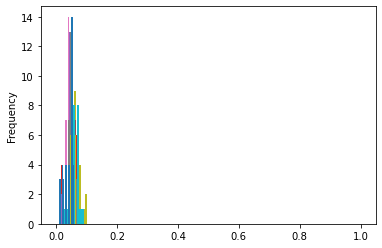

In [29]:
# 월별 평균
lst = []
for year in range(2000,2021):
    for month in range(1,2):
        df_ul1['자외선 B 일최고값'].loc[str(year)+'-'+str(month)].plot(kind='hist')
        print('연도 : ', str(year)+'-'+str(month))
        print('자외선 평균 : ',df_ul1['자외선 B 일최고값'].loc[str(year)+'-'+str(month)].mean() )

In [30]:
#  결측값이 너무 많아 기상청 자료에서 다시 가져옴

In [32]:
# 2005년 ~2016년 자외선데이터 합치기

df_ja = pd.DataFrame()
year = np.arange(2005,2016+1)

for y in year:
    df_year = pd.read_csv('./data/자외선_2005-2020/ENV_UV_132_DAY_{}_{}_2018.csv'.format(y,y),encoding = 'cp949')
    df_ja = pd.concat([df_ja,df_year])
df_ja

,지점,일시,일누적 자외선 A(MJ/m2),일최대 홍반자외선 B(W/m2 )
0,132,2005-01-01,NaN,0.036
1,132,2005-01-02,NaN,0.032
2,132,2005-01-03,NaN,0.027
3,132,2005-01-04,NaN,0.040
4,132,2005-01-05,NaN,0.044
...,...,...,...,...
361,132,2016-12-27,0.38,0.054
362,132,2016-12-28,0.38,0.053
363,132,2016-12-29,0.39,0.048
364,132,2016-12-30,0.33,0.043


In [33]:
# 2018년 ~2020년 합치기

year = [2018,2019,2020]
for y in year:
    df_year = pd.read_csv('./data/자외선_2005-2020/ENV_UV_132_DAY_{}_{}_2021.csv'.format(y,y),encoding = 'cp949')
    df_year.rename(columns={'일최대 자외선 B(W/m2 )': '일최대 홍반자외선 B(W/m2 )'},inplace=True)
    df_ja = pd.concat([df_ja,df_year])
df_ja

,지점,일시,일누적 자외선 A(MJ/m2),일최대 홍반자외선 B(W/m2 )
0,132,2005-01-01,NaN,0.036
1,132,2005-01-02,NaN,0.032
2,132,2005-01-03,NaN,0.027
3,132,2005-01-04,NaN,0.040
4,132,2005-01-05,NaN,0.044
...,...,...,...,...
361,132,2020-12-27,0.337,0.041
362,132,2020-12-28,0.380,0.045
363,132,2020-12-29,0.148,0.028
364,132,2020-12-30,0.308,0.048


In [34]:
df_ja['일시'] = df_ja['일시'].astype('datetime64')

In [35]:
 # 연속 날짜 데이터프레임과 병합
df_merge_u = pd.merge(df_days, df_ja ,how='left',left_on='시간',right_on='일시')
df_merge_u

,시간,지점,일시,일누적 자외선 A(MJ/m2),일최대 홍반자외선 B(W/m2 )
0,1990-01-01,NaN,NaT,NaN,NaN
1,1990-01-02,NaN,NaT,NaN,NaN
2,1990-01-03,NaN,NaT,NaN,NaN
3,1990-01-04,NaN,NaT,NaN,NaN
4,1990-01-05,NaN,NaT,NaN,NaN
...,...,...,...,...,...
11683,2021-12-27,NaN,NaT,NaN,NaN
11684,2021-12-28,NaN,NaT,NaN,NaN
11685,2021-12-29,NaN,NaT,NaN,NaN
11686,2021-12-30,NaN,NaT,NaN,NaN


In [36]:
df_merge_u.set_index('시간',inplace=True)

In [37]:
# df_ja 기상청데이터는 2005년부터 있음

df_merge_u1 = df_merge_u.loc['2005-01-01':'2020-12-31']

In [38]:
## 유효성 검증

df_merge_u1[df_merge_u1['일시'].isnull()]  # 2017년 자료 뺴고 다 들어있음을 확인

,지점,일시,일누적 자외선 A(MJ/m2),일최대 홍반자외선 B(W/m2 )
시간,,,,
2017-01-01,NaN,NaT,NaN,NaN
2017-01-02,NaN,NaT,NaN,NaN
2017-01-03,NaN,NaT,NaN,NaN
2017-01-04,NaN,NaT,NaN,NaN
2017-01-05,NaN,NaT,NaN,NaN
...,...,...,...,...
2017-12-27,NaN,NaT,NaN,NaN
2017-12-28,NaN,NaT,NaN,NaN
2017-12-29,NaN,NaT,NaN,NaN


In [39]:
## 자외선 데이터 2017년 다른데이터에서 가져와서 채워주기

df_ul_2017 = df_ul.loc['2017-01-01':'2017-12-31']
df_ul_2017

,일자,자외선 B 일최고값,Unnamed: 2
시간,,,
2017-01-01,2017-01-01,0.05,NaN
2017-01-02,2017-01-02,0.05,NaN
2017-01-03,2017-01-03,0.06,NaN
2017-01-04,2017-01-04,0.05,NaN
2017-01-05,2017-01-05,0.04,NaN
...,...,...,...
2017-12-27,2017-12-27,0.07,NaN
2017-12-28,2017-12-28,0.04,NaN
2017-12-29,2017-12-29,0.05,NaN


In [40]:
# 두 데이터 프레임 필요없는 행 없애주기

#(1) 기상청(2005~ 2020)
df_merge_u1.drop(columns = ['일누적 자외선 A(MJ/m2)','지점','일시'], inplace= True)
# 합쳐주기 위해 열이름 바꿔주기
df_merge_u1.rename(columns = {'일최대 홍반자외선 B(W/m2 )': '자외선 B 일최고값'}, inplace = True)

#(2) 2017년 자료

df_ul_2017.drop(columns = ['Unnamed: 2','일자'], inplace= True)

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [41]:
# 두 데이터 합치기
df_total = pd.concat([df_merge_u1,df_ul_2017]).sort_index()
df_total

,자외선 B 일최고값
시간,
2005-01-01,0.036
2005-01-02,0.032
2005-01-03,0.027
2005-01-04,0.040
2005-01-05,0.044
...,...
2020-12-27,0.041
2020-12-28,0.045
2020-12-29,0.028


In [42]:
#결측치 확인 : 596 개

df_total[df_total['자외선 B 일최고값'].isnull()]

,자외선 B 일최고값
시간,
2005-04-24,NaN
2005-07-25,NaN
2005-08-13,NaN
2005-08-20,NaN
2005-08-25,NaN
...,...
2020-12-09,NaN
2020-12-10,NaN
2020-12-14,NaN


In [43]:
#결측치 보간법으로 채우기

df_total['자외선 B 일최고값'] = df_total['자외선 B 일최고값'].interpolate()

In [44]:
df_total['자외선 B 일최고값'].isnull().sum()

0

In [45]:
df_total.to_csv('./data/자외선최종(2005-2020).csv')